### Plot IDM results

In [8]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pyslha
import matplotlib.pyplot as plt
import numpy as np
import imp,glob,os
cm = plt.cm.get_cmap('RdYlBu')

### Define path to SLHA and results folders

In [2]:
slhaFolder = '../slhaFiles/IDM_points'
resultsFolder = '../results/IDM_output'

### Read SModelS results:

In [3]:
#Convert Experimental Results list to a dictionary
data = []
for f in glob.glob(resultsFolder+'/*.py'):
    smodelsDict = imp.load_source(f.replace('.py',''),f).smodelsOutput
    slhaFile = os.path.basename(smodelsDict['OutputStatus']['input file'])
    slhaFile = os.path.join(slhaFolder,slhaFile)
    #Read SLHA file (using pyslha):
    slhaData = pyslha.readSLHAFile(slhaFile)
    data.append((slhaData,smodelsDict))

In [4]:
mHc = []
ctau = []
r = []
for slhaData,smodelsDict in data:
    if not 'ExptRes' in smodelsDict: #If no results were applicable, point is allowed
        rmax = 0.0
    else:
        rmax = smodelsDict['ExptRes'][0]['r'] #First result is the most constraining
    mass = slhaData.blocks['MASS'][37] #H+ mass
    width = slhaData.decays[37].totalwidth #H+ mass
    if width:    
        ct = 1.967e-16/width
    else:
        ct = 1e7
    
    mHc.append(mass)
    ctau.append(ct)
    r.append(rmax)

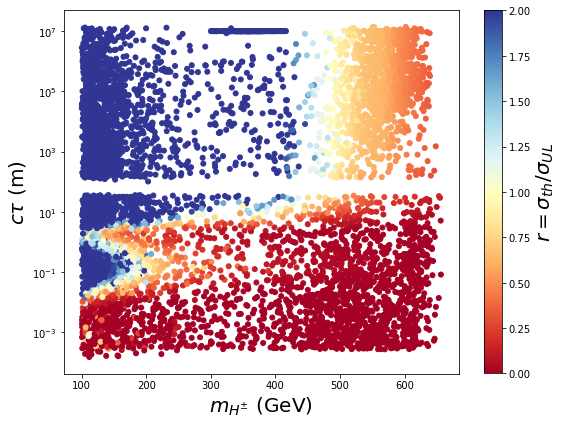

In [5]:
plt.figure(figsize=(8,6))
cp = plt.scatter(mHc,ctau, c=r, vmin=0., vmax=2., s=25, cmap=cm)
cb = plt.colorbar(cp)
plt.yscale('log')
plt.xlabel(r'$m_{H^{\pm}}$ (GeV)',fontsize=20)    
plt.ylabel(r'$c\tau$ (m)',fontsize=20)
cb.set_label(r'$r=\sigma_{th}/\sigma_{UL}$',fontsize=20)
plt.tight_layout()
plt.show()

### Get exclusion curve

In [37]:
#Convert points to 2D hist using linear interpolation
lctau = np.log10(ctau)
from scipy.interpolate import griddata

#Define bins and grid coordinates
xbins = np.arange(min(mHc),max(mHc),10.0)
ybins = np.arange(min(lctau),max(lctau),0.1)
X,Y = np.meshgrid(xbins, ybins)
binpts = np.array(list(zip(X.flat,Y.flat)))
#Interpolate the data
zbins = griddata(list(zip(mHc,lctau)),r,binpts)
#Reshape interpolated values
Z = np.reshape(zbins,(len(xbins),len(ybins)))

In [38]:
print(X.shape,Y.shape,Z.shape)

(110, 56) (110, 56) (56, 110)


In [39]:
min(lctau),max(lctau)

(-3.819328778996441, 7.13886331518901)

In [44]:
zbins

array([nan, nan, nan, ..., nan, nan, nan])

### Plot contours

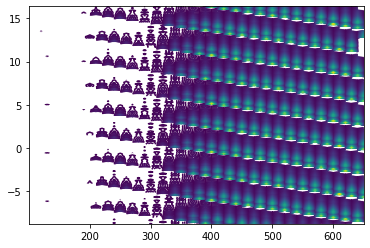

In [31]:
plt.contour(X, Y, Z, levels=100)
plt.show()